# NAMAN GUPTA LETS GROW MORE |||| INTERNSHIP DATA SCIENCE 
##Beginner Level Task 2 - Stock Market Prediction And Forecasting Using Stacked LSTM
##Algorithm Used - Stacked Long Short Term Memory

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
data_set = pd.read_csv('NSE-TATAGLOBAL.csv')
data_set

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
data_set.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data_set.tail(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
data_set.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

<AxesSubplot:>

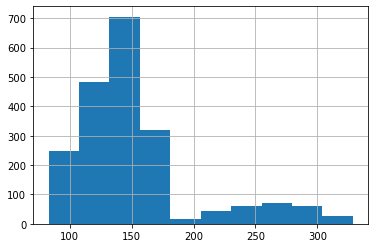

In [6]:
data_set['High'].hist()


In [7]:
training_set = data_set.iloc[:, 1:2].values

In [8]:
training_set


array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

data_training_scaled = scaler.fit_transform(training_set)


In [10]:
features_set = []
labels = []
for i in range(60, 586):
    features_set.append(data_training_scaled[i-60:i, 0])
    labels.append(data_training_scaled[i, 0])
    

In [11]:
features_set, labels = np.array(features_set), np.array(labels)

In [12]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape

(526, 60, 1)

In [14]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [15]:
m = Sequential()

In [17]:
m.compile(optimizer = 'adam', loss = 'mean_squared_error')

m.fit(features_set, labels, epochs = 50, batch_size = 20)

Epoch 1/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118A: 0s - loss: 0.011
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 11/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 12/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 13/50
27/27 [===========

In [18]:
dataset_test = pd.read_csv('NSE-TATAGLOBAL.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
real_stock_price 

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [24]:

data_total = pd.concat((data_set['Open'], data_set['Open']), axis=0)
test_inputs = data_total[len(data_total) - len(data_set) - 60:].values
test_inputs.shape
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
test_features = []
for i in range(60, 89):
    test_features.append(test_inputs[i-60:i, 0])
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
test_features.shape
predictions = m.predict(test_features)
predictions

array([[[0.20600162],
        [0.21654502],
        [0.21654502],
        ...,
        [0.1650446 ],
        [0.15896188],
        [0.16626115]],

       [[0.21654502],
        [0.21654502],
        [0.2175588 ],
        ...,
        [0.15896188],
        [0.16626115],
        [0.6202352 ]],

       [[0.21654502],
        [0.2175588 ],
        [0.19870235],
        ...,
        [0.16626115],
        [0.6202352 ],
        [0.6222628 ]],

       ...,

       [[0.17092457],
        [0.16788322],
        [0.17477697],
        ...,
        [0.62206   ],
        [0.6455799 ],
        [0.67234385]],

       [[0.16788322],
        [0.17477697],
        [0.16443634],
        ...,
        [0.6455799 ],
        [0.67234385],
        [0.6605839 ]],

       [[0.17477697],
        [0.16443634],
        [0.14557989],
        ...,
        [0.67234385],
        [0.6605839 ],
        [0.64760745]]], dtype=float32)

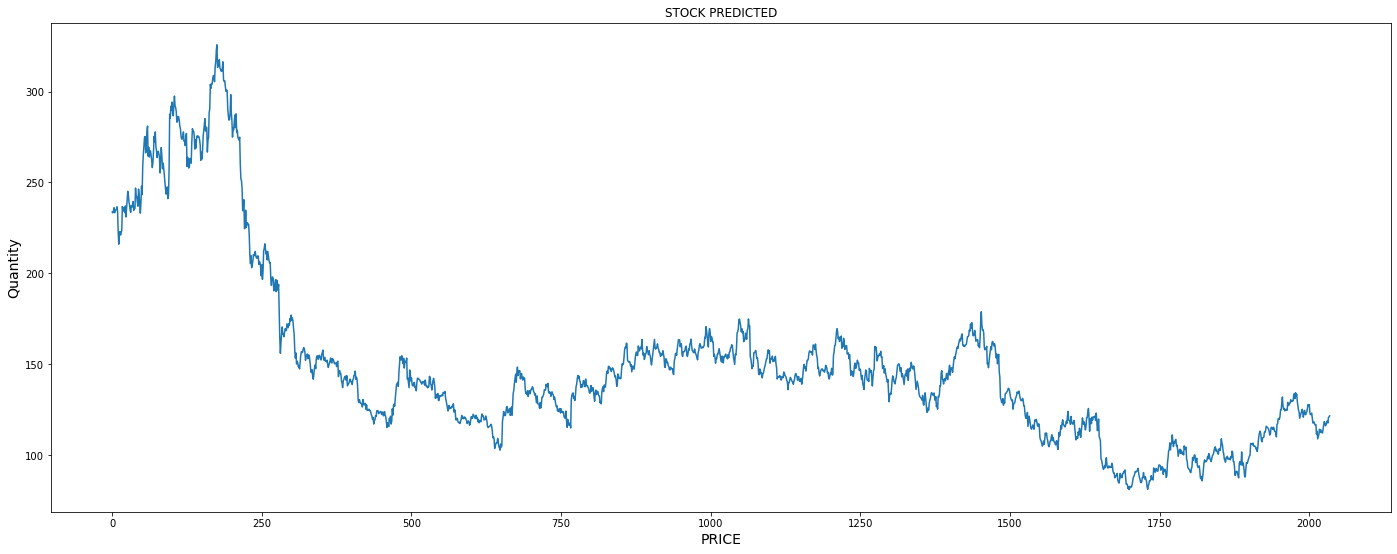

In [29]:

plt.figure(figsize=(24,9))
plt.title("STOCK PREDICTED")
plt.plot(dataset_test['Close'])
plt.xlabel('PRICE',fontsize=14)
plt.ylabel('Quantity',fontsize=14)
plt.show()